<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/pytorch_most_common_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Three Most Common Errors in PyTorch

PyTorch is one of the largest machine learning libraries available.

So it's likely you'll run into various errors when using it.

Because of the various maintenance and checks performed by the creators, it's rare the error will be because of the library itself.

This means the majority of the errors you run into will be user errors.

More specifically, you wrote the wrong code.

Don't be offended, this happens to every programmer.

Of the user errors you run into, chances are they'll be one of the following:

1. **Shape errors** - You're trying to perform an operation on matrices/tensors with shapes that don't line up. For example, your data's shape is `[1, 28, 28]` but your first layer takes an input of `[10]`.
2. **Device errors** - Your model is on a different device to your data. For example your model is on the GPU (e.g. `"cuda"`) and your data is on the CPU (e.g. `"cpu"`).
3. **Datatype errors** - Your data is one datatype (e.g. `torch.float32`), however the operation you're trying to perform requires another datatype (e.g. `torch.int64`).

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/misc-three-main-errors-in-pytorch.png" width=750 alt="the three most common errors in PyTorch"/>

Notice the recurring theme here.

There's some kind of mismatch between your shape(s), device(s) and/or datatype(s).

This notebook/blog post goes through examples of each of the above errors and how to fix them.

It won't prevent you from making them in the future but it will make you aware enough to perhaps reduce them and even more important, know how to solve them.

> **Note:** All of the following examples have been adapted from [learnpytorch.io](https://learnpytorch.io) which is the book version of the [Zero to Mastery: PyTorch for Deep Learning](https://dbourke.link/ZTMPyTorch) video course.


## 1. Shape errors in PyTorch

### 1.1 Matrix multiplication shape errors

PyTorch is one of the best frameworks to build neural network models with.

And one of the fundamental operations of a neural network is matrix multiplication.

However, matrix multiplication comes with very specific rules.

If these rules aren't adhered to, you'll get an infamous shape error.

```
# Example of shape error
RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)
```

Let's start with a brief example. 

> **Note:** Although it's called "matrix multiplication" almost every form of data in PyTorch comes in the form of a tensor. Where a tensor is an n-dimensional array (n can be any number). So while I use the terminology "matrix multiplication", this extends to "tensor multiplication" as well. See [00. PyTorch Fundamentals: Introduction to Tensors](https://www.learnpytorch.io/00_pytorch_fundamentals/#introduction-to-tensors) for more on the difference between matrices and tensors.

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.12.1+cu113


In [2]:
# Create two tensors
tensor_1 = torch.rand(3, 4)
tensor_2 = torch.rand(3, 4)

# Check the shapes
print(tensor_1.shape)
print(tensor_2.shape)

torch.Size([3, 4])
torch.Size([3, 4])


Notice both tensors have the same shape.

Let's try to perform a matrix multiplication on them.

> **Note:** The matrix multiplication operation is different to a standard multiplication operation. 
>
> With our current tensors, the standard multiplication operation (`*` or [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html)) will work where as the matrix multiplication operation (`@` or [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html)) will error. 
>
> See [00. PyTorch Fundamentals: Matrix Multiplication](https://www.learnpytorch.io/00_pytorch_fundamentals/#matrix-multiplication-is-all-you-need) for a breakdown of what happens in matrix multiplication.

In [3]:
# Standard multiplication, the following lines perform the same operation (will work)
tensor_3 = tensor_1 * tensor_2 # can do standard multiplication with "*"
tensor_4 = torch.mul(tensor_1, tensor_2) # can also do standard multiplicaton with "torch.mul()" 

# Check for equality 
tensor_3 == tensor_4

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Wonderful! Looks like standard multiplication works with our current tensor shapes.

Let's try matrix multiplication.

In [4]:
# Try matrix multiplication (won't work)
tensor_5 = tensor_1 @ tensor_2 # could also do "torch.matmul(tensor_1, tensor_2)"

RuntimeError: ignored

Oh no!

We get an error similar to the following:

```
RuntimeError                              Traceback (most recent call last)
<ipython-input-11-2ca2c90dbb42> in <module>
      1 # Try matrix multiplication (won't work)
----> 2 tensor_5 = tensor_1 @ tensor_2

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)
```

This is a **shape error**, our two tensors (matrices) can't be *matrix* multiplied because their shapes are incompatible.

Why?

This is because matrix multiplication has specific rules:

1. The **inner dimensions** must match:
* `(3, 4) @ (3, 4)` won't work 
* `(4, 3) @ (3, 4)` will work
* `(3, 4) @ (4, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
* `(4, 3) @ (3, 4)` -> `(4, 4)`
* `(3, 4) @ (4, 3)` -> `(3, 3)`

So how do we fix it?

This where either a *tranpose* or a *reshape* comes in.

And in the case of neural networks, it's more generally a tranpose operation. 

* **Transpose** - The tranpose ([`torch.transpose()`](https://pytorch.org/docs/stable/generated/torch.transpose.html)) operation swaps the dimensions of a given tensor.
  * **Note:** You can also use the shortcut of `tensor.T` to perform a transpose.
* **Reshape** - The reshape ([`torch.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html)) operation returns a tensor with the same number of original elements but in a different specified shape.

Let's see this in action.

In [5]:
# Perform a transpose on tensor_1 and then perform matrix multiplication 
tensor_6 = tensor_1.T @ tensor_2
print(f"Shape of input tensors: {tensor_1.T.shape} and {tensor_2.shape}")
print(f"Shape of output tensor: {tensor_6.shape}")

Shape of input tensors: torch.Size([4, 3]) and torch.Size([3, 4])
Shape of output tensor: torch.Size([4, 4])


No errors!

See how the input shape of `tensor_1` changed from `(3, 4)` to `(4, 3)` thanks to the tranpose (`tensor_1.T`).

And because of this, rule 1 of matrix multiplication, **the inner dimensions must match** was satisfied.

Finally, the output shape satisfied rule 2 of matrix multiplication, **the resulting matrix has the shape of the outer dimensions**.

In our case, `tensor_6` has a shape of `(4, 4)`.

Let's do the same operation except now we'll transpose `tensor_2` instead of `tensor_1`.

In [6]:
# Perform a transpose on tensor_2 and then perform matrix multiplication
tensor_7 = tensor_1 @ tensor_2.T
print(f"Shape of input tensors: {tensor_1.shape} and {tensor_2.T.shape}")
print(f"Shape of output tensor: {tensor_7.shape}")

Shape of input tensors: torch.Size([3, 4]) and torch.Size([4, 3])
Shape of output tensor: torch.Size([3, 3])


Woohoo!

No errors again!

See how rule 1 and rule 2 of matrix multiplication were satisfied again.

Except this time because we transposed `tensor_2`, the resulting output tensor shape is `(3, 3)`.

The good news is most of the time, when you build neural networks with PyTorch, the library takes care of most of the matrix multiplication operations you'll need to perform for you.

With that being said, let's build a neural network with PyTorch and see where shape errors might occur.

### 1.2 PyTorch neural network shape errors

We've seen how shape errors can occur when working with matrix multiplication (or matrix multiplying tensors).

Now let's build a neural network with PyTorch and see where shape errors can occur.

A shape error will occur in neural network in any of the following situations:
* **Incorrect input shape** - your data is in a certain shape but the model's first layer expects a different shape.
* **Incorrect input and output shapes between layers** - one of the layers of your model outputs a certain shape but the following layer expects a different shape as input.
* **No batch size dimension in input data when trying to make a prediction** - your model was trained on samples with a batch dimension, so when you try to predict on a single sample *without* a batch dimension, an error occurs.

To showcase these shape errors, let's build a simple neural network (the errors are the same regardless of the size of your network) to try and find patterns in the Fashion MNIST dataset (black and white images of 10 different classes of clothing).

> **Note:** The following examples focus specifically on shape errors rather than building the *best* neural network. You can see a fully working example of this problem in [03. PyTorch Computer Vision](https://www.learnpytorch.io/03_pytorch_computer_vision/).



### 1.3 Downloading a dataset

To begin, we'll get the Fashion MNIST dataset from [`torchvision.datasets`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html). 

In [7]:
import torchvision
from torchvision import datasets, transforms

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Now let's get some details about the first training sample, the label as well as the class names and number of classes.

In [10]:
# See first training sample
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [batch, height, width]") 
print(f"Label: {label}") # label is an int rather than a tensor (it has no shape attribute)

Image shape: torch.Size([1, 28, 28]) -> [batch, height, width]
Label: 9


Our image has a shape of `[1, 28, 28]` or `[batch_size, height, width]`. 

In [11]:
# See class names and number of classes
class_names = train_data.classes
num_classes = len(class_names)
class_names, num_classes

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

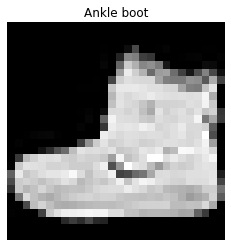

In [12]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray") # plot image as grayscale
plt.axis(False)
plt.title(class_names[label]);

### 1.4 Building a series of neural networks with different shape errors

Our problem is: build a neural network capable of finding patterns in grayscale images of clothing.

This statement could go very deep since "what neural network is the best?" is one of the main research problems in machine learning as a whole.

But let's start as simple as possible to showcase different error types.

We'll build several two layer neural networks with PyTorch each to showcase a different error:

| **Model number** | **Layers** | **Error showcase** | 
| ----- | ----- | ----- |
| 0 | 2 x `nn.Linear()` with 10 hidden units | Incorrect input shape |
| 1 | Same as model 1 + 1 x `nn.Flatten()` | Incorrect input shape (still) |
| 2 | 1 x `nn.Flatten()`, 1 x `nn.Linear()` with correct input shape and 1 x `nn.Linear()` with 10 hidden units | None (input shape is correct) |
| 3 | Same as model 2 but with different shapes between `nn.Linear()` layers | Incorrect shapes between layers |
| 4 | Same as model 3 but with last layer replaced with `nn.LazyLinear()` | None (shows how `nn.LazyX()` layers can infer correct shape) |
| 5 | Same as model 4 but with all `nn.Linear()` replaced with `nn.LazyLinear()` | None (shows how `nn.LazyX()` layers can infer correct shape)  | 

### 1.5 Incorrct input layer shapes 

We'll start with a two layer network with [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers with 10 hidden units in each. 

> **Note:** See [01. PyTorch Workflow section 6: Putting it all together](https://www.learnpytorch.io/01_pytorch_workflow/#6-putting-it-all-together) for what happens inside `nn.Linear()`.

And then we'll pass our `image` through it and see what happens.

In [14]:
from torch import nn

# Create a two layer neural network
model_0 = nn.Sequential(
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model (this will error)
model_0(image)

RuntimeError: ignored

Running the above code we get another shape error! 

Something similar to:

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)
```

The key is in the final line `RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)`.

This is telling us there's something wrong with our data shapes.

Because behind the scenes, `nn.Linear()` is attempting to do a matrix multiplication.

How do we fix this?

There are several different options depending on what kind of layer(s) you're using.

But since we're using `nn.Linear()` layers, let's focus on that.

`nn.Linear()` likes to accept data as a single-dimension vector .

For example, instead of an input `image` shape of `[1, 28, 28]`, it would prefer `[1, 784]` (`784 = 28*28`).

In other words, it likes all of the information to be *flattened* into a single dimension.

We can achieve this flattening using PyTorch's [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html). 

Let's see it happen.

In [16]:
# Create a flatten layer
flatten = nn.Flatten()

# Pass the image through the flatten layer
flattened_image = flatten(image)

# Print out the image shape before and after 
print(f"Before flatten shape: {image.shape} -> [batch, height, width]")
print(f"After flatten shape: {flattened_image.shape} -> [batch, height*width]")

Before flatten shape: torch.Size([1, 28, 28]) -> [batch, height, width]
After flatten shape: torch.Size([1, 784]) -> [batch, height*width]


Wonderful, image data flattened! 

Now let's try adding the `nn.Flatten()` layer to our existing model.

In [17]:
# Replicate model_0 except add a nn.Flatten() layer to begin with 
model_1 = nn.Sequential(
    nn.Flatten(), # <-- NEW: add nn.Flatten() layer
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_1(image)

RuntimeError: ignored

Oh no!

Another error...

Something like:

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)
```

Again, the key information is in the bottom line. 

`RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)`

Hmm, we know the `(1x784)` must be coming from our input data (`image`) since we flattened it from `(1, 28, 28)` -> `(1, 784)`.

How about the `(10x10)`?

These values come from the parameters we set in our `nn.Linear()` layers, `in_features=10` and `out_features=10` or `nn.Linear(in_features=10, out_features=10)`.

What was the first rule of matrix multiplication again?

1. The **inner dimensions** must match.

Right!

So what happens if we change `in_features=10` to `in_features=784` in the first layer?

Let's find out!

In [19]:
# Flatten the input as well as make sure the first layer can accept the flattened input shape
model_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # <-- NEW: change in_features=10 to in_features=784
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_2(image)

tensor([[ 0.1973,  0.1827,  0.0598, -0.2477,  0.0990, -0.2474, -0.0067, -0.1186,
          0.2797, -0.0429]], grad_fn=<AddmmBackward0>)

It worked!

We got an output from our model!

The output might not mean much for now but at least we know all of the shapes line up and data can flow all the through our model.

The `nn.Flatten()` layer turned our input image from `(1, 28, 28)` to `(1, 784)` and our first `nn.Linear(in_features=784, out_features=10)` layer could accept it as input.



### 1.6 Incorrect hidden layer input and output shapes

What happens if our input layer(s) had the correct shapes but there was a mismatch between the interconnected layer(s)?

As in, our first `nn.Linear()` had `out_features=10` but the next `nn.Linear()` had `in_features=5`.

This is an example of **incorrect input and output shapes between layers**. 


In [20]:
# Create a model with incorrect input and output shapes between layers
model_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # out_features=10 
    nn.Linear(in_features=5, out_features=10) # <-- NEW: in_features does not match the out_features of the previous layer
)

# Pass the image through the model (this will error)
model_3(image)

RuntimeError: ignored

Running the model above we get the following error:

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 5x10)
```

Once again, we've broken rule 1 of matrix multiplication, the **inner dimensions** must match.

Our first `nn.Linear()` layer outputs a shape of `(1, 10)` but our second `nn.Linear()` layer is expecting a shape of `(1, 5)`.

How could we fix this?

Well, we could set `in_features=10` for the second `nn.Linear()` manually, or we could try one of the newer features of PyTorch, "lazy" layers.


### 1.7 PyTorch lazy layers (automatically infering the input shape)

Lazy layers in PyTorch often come in the form of `nn.LazyX` where `X` is an existing non-lazy form of the layer.

For example, the lazy equilvalent of `nn.Linear()` is [`nn.LazyLinear()`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html).

The main feature of a `Lazy` layer is to *infer* what the `in_features` or input shape from the previous layer should be.

> **Note:** As of November 2022, `Lazy` layers in PyTorch are still experimental and subject to change, however their usage shouldn't differ too dramatically from what's below.

For example, if the previous layer has `out_features=10`, the subsequent `Lazy` layer should infer that `in_features=10`.

Let's test it out. 

In [21]:
# Try nn.LazyLinear() as the second layer
model_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW: no in_features parameter as this is inferred from the previous layer's output
)

# Pass the image through the model
model_4(image)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[-0.2634, -0.5343,  0.4151,  0.0441,  0.1016, -0.0174,  0.1830, -0.1282,
          0.0194,  0.4193]], grad_fn=<AddmmBackward0>)

It works (though there may be a warning depending on the version of PyTorch you're using, if so, don't worry, it's just to say the `Lazy` layers are still in development)!

How about we try replacing all the `nn.Linear()` layers with `nn.LazyLinear()` layers?

Then we'll only have to set the `out_features` values for each.

In [23]:
# Replace all nn.Linear() layers with nn.LazyLinear()
model_5 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW 
)

# Pass the image through the model
model_5(image)

tensor([[ 0.3281,  0.1542, -0.3209,  0.0141, -0.0008,  0.2368, -0.3739,  0.1751,
          0.2002, -0.0280]], grad_fn=<AddmmBackward0>)

Nice!

It worked again, our image was able to flow through the network without any issues.

> **Note:** The above examples only deal with one type of layer in PyTorch, `nn.Linear()`, however, the principles of lining up input and output shapes with each layer is a constant throughout all neural networks and different types of data. 
>
> Layers like [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), used in convolutional neural networks (CNNs) can even accept inputs without the use of `nn.Flatten()`. You can see more on this in [03. PyTorch Computer Vision section 7: Building a CNN](https://www.learnpytorch.io/03_pytorch_computer_vision/#7-model-2-building-a-convolutional-neural-network-cnn).

## 2. Device errors in PyTorch

One of the main benefits of PyTorch is the in-built ability for doing computations on a GPU (graphics processing unit).

GPUs can often perform operations, specifically matrix multiplications (which make up the most of neural networks) much faster than CPUs (central processing units).

If you're using vanilla PyTorch (no other external libraries), PyTorch requires you to explicitly set which device you're computing on.

For example, to send your model to a target `device`, you would use the [`to()`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) method, such as `model.to(device)`.

And similarly for data `some_dataset.to(device)`.

**Device errors** occur when your model/data are on different devices.

Such as when you've sent your model to the target GPU device but your data is still on the CPU.



### 2.1 Setting the target device 

Let's set our current device to `"cuda"` if it's available.

> **Note:** See [00. PyTorch Fundamentals: Running Tensors on GPUs](https://www.learnpytorch.io/00_pytorch_fundamentals/#running-tensors-on-gpus-and-making-faster-computations) for more information about how to get access to a GPU and set it up with PyTorch.

In [24]:
import torch

# Set device to "cuda" if it's available otherwise default to "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device: {device}")

Current device: cuda


Now let's create a model with the same layers as `model_5`.

In PyTorch, models and tensors are created on the CPU by default.

We can test this by checking the `device` attribute of the model we create.

In [25]:
from torch import nn

# Create a model (similar to model_5 above)
model_6 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10), 
    nn.LazyLinear(out_features=10)
)

# All models and tensors are created on the CPU by default (unless explicitly set otherwise)
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cpu


### 2.2 Preparing data for modelling

To prepare our data for modelling, let's create some PyTorch `DataLoader`'s.

To make things quicker, we'll use an instance of [`torch.utils.data.RandomSampler`](https://pytorch.org/docs/stable/data.html#torch.utils.data.RandomSampler) to randomly select 10% of the training and testing samples (we're not interested in the best performing model as much as we are in showcasing potential errors).

We'll also setup a loss function of `torch.nn.CrossEntropyLoss()` as well as an optimizer of `torch.optim.SGD(lr=0.01)`.

> **Note:** For more information on preparing data, loss functions and optimizers for training a PyTorch model, see [01. PyTorch Workflow Fundamentals section 3: Training a model](https://www.learnpytorch.io/01_pytorch_workflow/#3-train-model).

In [27]:
from torch.utils.data import DataLoader, RandomSampler

# Only sample 10% of the data
train_sampler = RandomSampler(train_data, 
                              num_samples=int(0.1*len(train_data)))

test_sampler = RandomSampler(test_data, 
                             num_samples=int(0.1*len(test_data)))

print(f"Number of random training samples selected: {len(train_sampler)}/{len(train_data)}")
print(f"Number of random testing samples selected: {len(test_sampler)}/{len(test_data)}")

# Create DataLoaders and turn data into batches
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              sampler=train_sampler)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             sampler=test_sampler)

print(f"Number of batches in train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)} batch of size {BATCH_SIZE}")

# Create loss function
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(lr=0.01, 
                            params=model_6.parameters())

Number of random training samples selected: 6000/60000
Number of random testing samples selected: 1000/10000
Number of batches in train_dataloader: 188 batches of size 32
Number of batches in test_dataloader: 32 batch of size 32


### 2.3 Training a model on the CPU

Data ready, model ready, let's train!

We'll use a standard PyTorch training loop to do five epochs of training with `model_6` going over 10% of the data.

Don't worry too much here about the loss being as low as it could be as we're more focused on making sure there aren't any errors than having the lowest possible loss.

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/01-pytorch-training-loop-annotated.png" alt="annotated pytorch training loop steps" width=750/>

> **Note:** For more information on the steps in a PyTorch training loop, see [01. PyTorch Workflow section 3: PyTorch training loop](https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-training-loop).

In [28]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Forward pass
    y_pred = model_6(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  
  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 351.74
Epoch: 1 | Training loss: 228.72
Epoch: 2 | Training loss: 181.69
Epoch: 3 | Training loss: 163.14
Epoch: 4 | Training loss: 153.80


Nice! Looks like our training loop is working!

Our model's loss is going down (the lower the loss the better).

### 2.4 Attempting to train a model on the GPU (with errors)

Now let's send our `model_6` to the target `device` (in our case, this is a `"cuda"` GPU).

In [29]:
# Send model_6 to the target device ("cuda")
model_6.to(device)

# Print out what device the model is on
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cuda:0


Our `model_6` is on the `"cuda:0"` (where `0` is the index of the device, in case there was more than one GPU) device.

Now let's run the same training loop code as above and see what happens.

Can you guess?

In [30]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Forward pass
    y_pred = model_6(X) # model is on GPU, data is on CPU (will error)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  
  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: ignored

Whoops!

Looks like we go a device error:

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

We can see the error states `Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!`.

In essence, our model is on the `cuda:0` device but our data tensors (`X` and `y`) are still on the `cpu` device.

But **PyTorch expects *all* tensors to be on the same device**.





### 2.5 Training a model on the GPU (without errors) 

Let's fix this error but sending our data tensors (`X` and `y`) to the target `device` as well.

We can do so using `X.to(device)` and `y.to(device)`.


In [31]:
# Send the model to the target device (we don't need to do this again but we will for completeness)
model_6.to(device)

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Put target data on target device  <-- NEW
    X, y = X.to(device), y.to(device) # <-- NEW: send data to target device

    # Forward pass
    y_pred = model_6(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  
  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 140.79
Epoch: 1 | Training loss: 135.18
Epoch: 2 | Training loss: 131.64
Epoch: 3 | Training loss: 124.35
Epoch: 4 | Training loss: 120.91


Excellent!

Our training loop completes just as before because now both our model *and* data tensors are on the same device.

> **Note:** Libraries like [HuggingFace Accelerate](https://github.com/huggingface/accelerate) are a fantastic way to train your PyTorch models with minimal explicit device setting (they discover the best device to use and set things up for you). You could also write functions to ensure your training code happens all on the same device, see [05. PyTorch Going Modular section 4: Creating training functions](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them) for more.

### 2.6 Device errors when making predictions

We've seen device errors whilst training but the same error can occur during testing or inference (making predictions).

The whole idea of training a model on some data is to use it to make predictions on *unseen* data.

Let's take our trained `model_6` and use it to make a prediction on a sample from the test dataset.

In [32]:
# Get a single sample from the test dataset
test_image, test_label = test_data.data[0], test_data.targets[0]
print(f"Test image shape: {test_image.shape}")
print(f"Test image label: {test_label}")

Test image shape: torch.Size([28, 28])
Test image label: 9


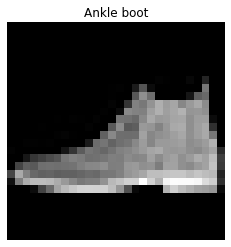

In [33]:
# Plot test image
import matplotlib.pyplot as plt
plt.imshow(test_image, cmap="gray")
plt.axis(False)
plt.title(class_names[test_label]);

Looking good!

Now let's try to make a prediction on it by passing it to our `model_6`.

In [34]:
# Pass the test image through model_6 to make a prediction
model_6(test_image)

RuntimeError: ignored

Dam!

We get another device error.

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

This is because our `model_6` is on the GPU (`"cuda"`), however, our `test_image` is on the CPU (in PyTorch, all tensors are on the CPU by default).

Let's send the `test_image` to the target `device` and then try the prediction again.

In [35]:
# Send test_image to target device
model_6(test_image.to(device))

RuntimeError: ignored

Oh no! Another error...

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x10)
```

This time it's a shape error. 

We've seen these before.

What's going on with our `test_image` shape?

Perhaps it's because our model was trained on images that had a batch dimension?

And our current `test_image` doesn't have a batch dimension?

Here's another helpful rule of thumb to remember: **trained models like to predict on data in the same format and shape that they were trained on**.

This means if our model was trained on images with a batch dimension, it'll tend to like to predict on images with a batch dimension, even if the batch dimension is only 1 (a single sample).

And if our model was trained on data in the format `torch.float32` (or another format), it'll like to predict on data in that same format (we'll see this later on).

We can add a single batch dimension to our `test_image` using the [`torch.unsqueeze()`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) method.

In [36]:
# Changing the input size to be the same as what the model was trained on
original_input_shape = test_image.shape
updated_input_shape = test_image.unsqueeze(dim=0).shape # adding a batch dimension on the "0th" dimension

# Print out shapes of original tensor and updated tensor
print(f"Original input data shape: {original_input_shape} -> [height, width]")
print(f"Updated input data shape (with added batch dimension): {updated_input_shape} -> [batch, height, width]")

Original input data shape: torch.Size([28, 28]) -> [height, width]
Updated input data shape (with added batch dimension): torch.Size([1, 28, 28]) -> [batch, height, width]


Nice!

We've found a way to add a batch dimension to our `test_image`.

Let's try make a prediction on it again.

In [37]:
# Make prediction on test image with additional batch size dimension and with it on the target device
model_6(test_image.unsqueeze(dim=0).to(device))

RuntimeError: ignored

What?

Another error!

This time it's a datatype error:

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: expected scalar type Float but found Byte
```

We've stumbled upon the third most common error in PyTorch, datatype errors.

Let's figure out how to fix them in the next section.

## 3. Datatype errors in PyTorch

Recall the rule of thumb: **trained models like to predict on data that's in the same shape and format that they were trained on**.

It looks like our model expects a `Float` datatype but our `test_image` is in `Byte` datatype.

We can tell this by the last line in the previous error:

```
RuntimeError: expected scalar type Float but found Byte
```

Why is this?

It's because our `model_6` was trained on data samples in the format of `Float`, specifically, `torch.float32`.

How do we know this?

Well, `torch.float32` is the default for many tensors in PyTorch, unless explicitly set otherwise.

But let's do a check to make sure.



### 3.1 Checking the datatype of the data the model was trained on 

We can check the datatype of the data our model was trained on by looking at the `dtype` attribute of a sample from our `train_dataloader`.

In [38]:
# Get a single sample from the train_dataloader and print the dtype
train_image_batch, train_label_batch = next(iter(train_dataloader))
train_image_single, train_label_single = train_image_batch[0], train_label_batch[0]

# Print the datatype of the train_image_single
print(f"Datatype of training data: {train_image_single.dtype}")

Datatype of training data: torch.float32


There we go! We confirmed our training data samples are in `torch.float32`.

So it makes sense that our `model_6` wants to predict on this datatype.

But how did our training data get in that datatype?

It happened back in section 1.3 when we downloaded the Fashion MNIST dataset and used the `transform` parameter of [`torchvision.transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html).

This `transform` converts whatever data is passed to it into a `torch.Tensor` with the *default* datatype `torch.float32`.

So another rule of thumb: **when making predictions, whatever transforms you performed on the training data, you should also perform on the testing data**.


### 3.2 Changing the datatype of a tensor

In our case, we could create a standalone transform to transform our test data but we can also change the datatype of a target tensor with `tensor.type(some_type_here)`, for example, `tensor_1.type(torch.float32)`. 

Let's try it out.

In [39]:
# Print out the original datatype of test_image
print(f"Original datatype: {test_image.unsqueeze(dim=0).dtype}")

# Change the datatype of test_image and see the change
print(f"Changing the datatype: {test_image.unsqueeze(dim=0).type(torch.float32).dtype}")

Original datatype: torch.uint8
Changing the datatype: torch.float32


### 3.3 Making predictions on a test image and making sure it's in the right format

Alright, it looks like we've got all of the pieces of the puzzle ready, shape, device and datatype, let's try and make a prediction!

> **Note:** Remember a model likes to make predictions on data in the same (or similar) format to what it was trained on (shape, device and datatype).

In [40]:
# Make a prediction with model_6 on the transformed test_image
pred_on_gpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32) # convert the datatype to torch.float32
                      .to(device)) # send the tensor to the target device
pred_on_gpu

tensor([[-1524.6857, -1446.1508,  -924.2405,  -738.5865,   -89.0332,  1161.8552,
          -401.7952,  1399.7031,   778.4608,  1718.0710]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

Woohoo!!!

A fair few steps but our `model_6` successfully makes a prediction on `test_image`.

Since `test_image` is on the CPU by default, we could also put the model back on the CPU using the [`.cpu()` method](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) and make the same prediction on the CPU device instead of the GPU device.

In [41]:
# Put model back on CPU
model_6.cpu()
 
# Make a prediction on the CPU device (no need to put test_image on the CPU as it's already there)
pred_on_cpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32)) # convert the datatype to torch.float32 
pred_on_cpu

tensor([[-1524.6855, -1446.1506,  -924.2405,  -738.5865,   -89.0332,  1161.8552,
          -401.7951,  1399.7031,   778.4608,  1718.0712]],
       grad_fn=<AddmmBackward0>)

And again the prediction works!

Is it correct?

We can check by the taking the model's raw outputs and converting them from `raw logits -> prediction probabilities -> prediction label` (see [02. PyTorch Neural Network Classification section 3.1](https://www.learnpytorch.io/02_pytorch_classification/#31-going-from-raw-model-outputs-to-predicted-labels-logits-prediction-probabilities-prediction-labels) for more on this conversion).

In [42]:
# Convert raw logits to prediction probabilities
pred_probs = torch.softmax(pred_on_cpu, dim=1)

# Convert prediction probabilities to prediction label
pred_label = torch.argmax(pred_probs, dim=1)

# Check if it's correct
print(f"Test label: {test_label}")
print(f"Pred label: {pred_label}")
print(f"Is the prediction correct? {pred_label.item() == test_label}")

Test label: 9
Pred label: tensor([9])
Is the prediction correct? True


There can a fair few steps involved when making predictions on a test or custom sample.

So one of the ways to prevent repeating all of these steps is to turn them into a function.

There's an example of this in [04. PyTorch Custom Datasets section 11.3: Building a function to predict on custom images](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function). 

## Putting it all together 

We've been hands on with three of the main errors you'll come across when building neural networks with PyTorch:

1. **Shape errors** - there are mismatches between the data you're working with the neural network you're building to find patterns in or there are mismatches between the connecting layers of your neural network.
2. **Device errors** - your model and data are on different devices, PyTorch expects *all* tensors and objects to be on the *same* device.
3. **Datatype errors** - your trying to compute on one datatype when your model expects another datatype.

And we've seen how and why they occur and then how to fix them:

* Your model wants to make predictions on same kind of data it was trained on (shape, device and datatype).
* Your model and data should be on same device for training and testing.
* You can take care of many of these issues by creating reusable functions that define `device` and datatype, such as in [04. PyTorch Going Modular section 4: Creating training and testing functions](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).

Knowing about these errors won't prevent you from making them in the future but it will give you an idea of where to go to fix them.

For more in-depth examples of these errors, including making them and fixing in a hands-on manner, check out the [Zero to Mastery: PyTorch for Deep Learning course](https://dbourke.link/ZTMPyTorch).